In [1]:
import tensorflow.keras.utils as utils #분류 분석시 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
import numpy as np

# 머신러닝:데이터에서 법칙성을 추출
- 다양한 분야에서 응용:글씨인식,문장분류,주식예측,질병진단,얼굴식별,음성인식
- 지도학습(독립변수(입력변수),종속변수(타켓변수))
- 회귀분석(타겟변수가 연속형) vs분류분석(multi,binary)
- 비지도학습-군집화 강화학습
- 1.데이터 생성:원본 데이터 및 시물레이션을 통해 데이터 생성
- 2.전처리 훈련셋(학습셋),검증셋,시험셋(테스트셋) 머신러닝 및 딥러닝 모델에서 학습
    및 평가를 할 수 있도록 포멧 변환
- 3.모델 구성 시퀀스 객체 생성한 뒤 필요한  add()함수를 이용해 레이어 추가
- 4.모델 학습과정 설정 compile()함수 이용,손실함수,optimizer,metrics(평가지표)
- 5.모델 학습 시키기>>fit() 함수 이용,학습횟수,검증셋
- 6.모델 평가 시험셋을 인자로 넣는 evaluate() 함수 이용,그래프
- 7.모델 사용 predict() 이용
- 8.모델 저장 save() 함수 이용해서 저장,load_model()함수를 이용해서 모델 불러오기

# 1.데이터 셋

# 2.데이터 전처리

In [4]:
#학습 데이터=훈련데이터 #90개
X_train=np.array([1,2,3,4,5,6,7,8,9]*10)
Y_train=np.array([2,4,6,8,10,12,14,16,18]*10)
#검증데이터 #9개
X_val=np.array([1,2,3,4,5,6,7,8,9])
Y_val=np.array([2,4,6,8,10,12,14,16,18])

In [5]:
X_train

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7,
       8, 9])

In [6]:
#분류분석을 하기 위해 target을 라벨링 전환(원 핫 인코딩)
Y_train=utils.to_categorical(Y_train,19)#왜 19개??
Y_val=utils.to_categorical(Y_val,19)

In [8]:
Y_train.shape

(90, 19)

In [10]:
Y_val.shape

(9, 19)

In [9]:
Y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [16]:
Y_val

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]], dtype=float32)

In [17]:
X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

((90,), (90, 19), (9,), (9, 19))

In [18]:
model=Sequential()
model.add(Dense(units=38,input_dim=1,activation="sigmoid"))
#units:출력수
model.add(Dense(units=64,activation="elu"))
model.add(Dense(units=32,activation="elu"))
model.add(Dense(units=19,activation="softmax"))
#softmax:모든 출력결과의 합이 1,분류분석의 마지막 레이어에서 activation 함수로

In [19]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 38)                76        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2496      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 19)                627       
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________
None


# 4.모델 학습과정 설정

In [20]:
model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# 5.모델 학습시키기

In [22]:
hist=model.fit(X_train,Y_train,epochs=300,batch_size=10,verbose=2,validation_data
              =(X_val,Y_val))

Epoch 1/300
9/9 - 1s - loss: 2.8726 - accuracy: 0.1111 - val_loss: 2.7878 - val_accuracy: 0.1111
Epoch 2/300
9/9 - 0s - loss: 2.7519 - accuracy: 0.1111 - val_loss: 2.6852 - val_accuracy: 0.1111
Epoch 3/300
9/9 - 0s - loss: 2.6653 - accuracy: 0.1111 - val_loss: 2.6053 - val_accuracy: 0.1111
Epoch 4/300
9/9 - 0s - loss: 2.5850 - accuracy: 0.1111 - val_loss: 2.5388 - val_accuracy: 0.1111
Epoch 5/300
9/9 - 0s - loss: 2.5265 - accuracy: 0.1111 - val_loss: 2.4837 - val_accuracy: 0.1111
Epoch 6/300
9/9 - 0s - loss: 2.4741 - accuracy: 0.1111 - val_loss: 2.4350 - val_accuracy: 0.1111
Epoch 7/300
9/9 - 0s - loss: 2.4293 - accuracy: 0.1111 - val_loss: 2.3930 - val_accuracy: 0.1111
Epoch 8/300
9/9 - 0s - loss: 2.3926 - accuracy: 0.1111 - val_loss: 2.3560 - val_accuracy: 0.1111
Epoch 9/300
9/9 - 0s - loss: 2.3594 - accuracy: 0.1111 - val_loss: 2.3223 - val_accuracy: 0.2222
Epoch 10/300
9/9 - 0s - loss: 2.3245 - accuracy: 0.1667 - val_loss: 2.2924 - val_accuracy: 0.2222
Epoch 11/300
9/9 - 0s - loss:

Epoch 85/300
9/9 - 0s - loss: 1.3512 - accuracy: 0.6444 - val_loss: 1.3193 - val_accuracy: 0.6667
Epoch 86/300
9/9 - 0s - loss: 1.3404 - accuracy: 0.5222 - val_loss: 1.3102 - val_accuracy: 0.7778
Epoch 87/300
9/9 - 0s - loss: 1.3269 - accuracy: 0.6111 - val_loss: 1.3019 - val_accuracy: 0.7778
Epoch 88/300
9/9 - 0s - loss: 1.3203 - accuracy: 0.6889 - val_loss: 1.2951 - val_accuracy: 0.7778
Epoch 89/300
9/9 - 0s - loss: 1.3211 - accuracy: 0.7333 - val_loss: 1.2860 - val_accuracy: 0.7778
Epoch 90/300
9/9 - 0s - loss: 1.3045 - accuracy: 0.6111 - val_loss: 1.2795 - val_accuracy: 0.6667
Epoch 91/300
9/9 - 0s - loss: 1.2987 - accuracy: 0.6222 - val_loss: 1.2708 - val_accuracy: 0.7778
Epoch 92/300
9/9 - 0s - loss: 1.2924 - accuracy: 0.7111 - val_loss: 1.2621 - val_accuracy: 0.7778
Epoch 93/300
9/9 - 0s - loss: 1.2795 - accuracy: 0.6556 - val_loss: 1.2552 - val_accuracy: 0.6667
Epoch 94/300
9/9 - 0s - loss: 1.2702 - accuracy: 0.6667 - val_loss: 1.2472 - val_accuracy: 0.7778
Epoch 95/300
9/9 - 0

Epoch 168/300
9/9 - 0s - loss: 0.8597 - accuracy: 0.8444 - val_loss: 0.8303 - val_accuracy: 1.0000
Epoch 169/300
9/9 - 0s - loss: 0.8633 - accuracy: 0.8667 - val_loss: 0.8372 - val_accuracy: 0.7778
Epoch 170/300
9/9 - 0s - loss: 0.8508 - accuracy: 0.8444 - val_loss: 0.8170 - val_accuracy: 0.8889
Epoch 171/300
9/9 - 0s - loss: 0.8570 - accuracy: 0.8778 - val_loss: 0.8138 - val_accuracy: 0.8889
Epoch 172/300
9/9 - 0s - loss: 0.8309 - accuracy: 0.8556 - val_loss: 0.8192 - val_accuracy: 0.8889
Epoch 173/300
9/9 - 0s - loss: 0.8515 - accuracy: 0.8556 - val_loss: 0.8074 - val_accuracy: 0.8889
Epoch 174/300
9/9 - 0s - loss: 0.8249 - accuracy: 0.9111 - val_loss: 0.8003 - val_accuracy: 0.8889
Epoch 175/300
9/9 - 0s - loss: 0.8328 - accuracy: 0.8444 - val_loss: 0.7997 - val_accuracy: 1.0000
Epoch 176/300
9/9 - 0s - loss: 0.8214 - accuracy: 0.9111 - val_loss: 0.7944 - val_accuracy: 1.0000
Epoch 177/300
9/9 - 0s - loss: 0.8282 - accuracy: 0.8889 - val_loss: 0.7948 - val_accuracy: 1.0000
Epoch 178/

Epoch 251/300
9/9 - 0s - loss: 0.6120 - accuracy: 0.8556 - val_loss: 0.5446 - val_accuracy: 1.0000
Epoch 252/300
9/9 - 0s - loss: 0.5614 - accuracy: 0.9222 - val_loss: 0.5411 - val_accuracy: 1.0000
Epoch 253/300
9/9 - 0s - loss: 0.5590 - accuracy: 0.8889 - val_loss: 0.5350 - val_accuracy: 0.8889
Epoch 254/300
9/9 - 0s - loss: 0.5606 - accuracy: 0.9111 - val_loss: 0.5426 - val_accuracy: 0.8889
Epoch 255/300
9/9 - 0s - loss: 0.5494 - accuracy: 0.9000 - val_loss: 0.5239 - val_accuracy: 1.0000
Epoch 256/300
9/9 - 0s - loss: 0.5725 - accuracy: 0.8222 - val_loss: 0.5279 - val_accuracy: 1.0000
Epoch 257/300
9/9 - 0s - loss: 0.5589 - accuracy: 0.9667 - val_loss: 0.5234 - val_accuracy: 1.0000
Epoch 258/300
9/9 - 0s - loss: 0.5394 - accuracy: 0.9667 - val_loss: 0.5129 - val_accuracy: 1.0000
Epoch 259/300
9/9 - 0s - loss: 0.5227 - accuracy: 0.9889 - val_loss: 0.5085 - val_accuracy: 1.0000
Epoch 260/300
9/9 - 0s - loss: 0.5432 - accuracy: 0.9222 - val_loss: 0.5271 - val_accuracy: 0.8889
Epoch 261/

# 6. 모델 평가하기(모델 학습과정 살펴보고 evaluate)

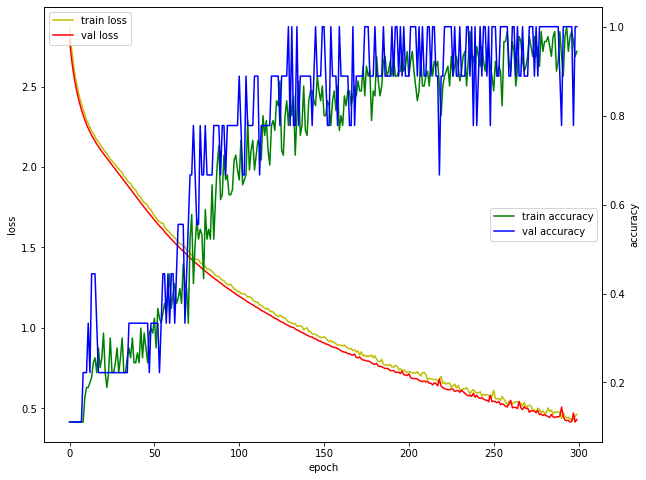

In [33]:
# 모델의 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label="val loss")

acc_ax = loss_ax.twinx() #loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [24]:
# 모델 평가하기
score = model.evaluate(X_val, Y_val, batch_size=1)

9/9 [==============================] - 0s 751us/step - loss: 0.4307 - accuracy: 1.0000


In [25]:
score

[0.43072158098220825, 1.0]

In [26]:
print('평가된 loss :', score[0])
print('평가된 accuracy :', score[1]*100, '%')

평가된 loss : 0.43072158098220825
평가된 accuracy : 100.0 %


# 7. 모델 사용하기(모델을 이용해서 예측하기)

In [27]:
H = model.predict(np.array([2]))
H

array([[2.3990742e-12, 6.9151567e-14, 5.8273926e-02, 9.0813811e-14,
        8.5124344e-01, 7.9255190e-13, 8.8632852e-02, 3.3460474e-12,
        1.8464412e-03, 3.3743647e-11, 3.3460419e-06, 1.9491624e-15,
        1.5802401e-10, 9.0089394e-14, 4.7902246e-15, 2.1018557e-14,
        2.2369717e-20, 6.3395383e-13, 4.1305545e-28]], dtype=float32)

In [28]:
model.predict(np.array([2])).argmax()

4

In [29]:
H[0,H.argmax()] *100

85.12434363365173

# 7. 모델 저장하기
model.save('model/3_deep_begin.h5')

# 저장된 모델 사용하기

In [30]:
from tensorflow.keras.models import load_model
model2 = load_model('model/3_deep_begin.h5')

In [31]:
model2.predict(np.array([2])).argmax()

4